<h1 style="text-align: center; color: #2980B9">Análisis Exploratorio de Datos: Precio de viviendas</h1>

<h2 style="color: #3498DB">Siuación a resolver</h2>

El objetivo del presente trabajo es realizar un analisis exploratorio de datos del dataset train.csv, que incluye datos sobre el mercado inmoviliario en India, para comprender sus caracteristicas y encarar el entrenamiento de un modelo de machine learning con un conocimiento solido.<br>
Las caracteristicas que se buscan descubrir incluyen la cantidad de datos, variables, tipos, formatos, correlaciones entre varaibles, outliers, correlaciones con el target, valores nulos y distribucion de las variables.

<h2 style="color: #3498DB">Analisis General</h2>

Aqui se importan las librerias pandas, matplotlib y seaborn. El  primero es usado para extrar, transformar y describir datos mientras que los dos ultimos se utilizan para realizar graficos estadisticos que muestren dsitribuciones y relaciones.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lo primero es crear un DataFrame con el contenido del archivo train.csv donde se encuentran todos los datos. 

In [7]:
df = pd.read_csv("train.csv")
sns.set_style("whitegrid")

Se imprimen las diez primeras filas para tener una idea de como se presentan los datos

In [8]:
df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


Se observa que el dataset posee 29451 entradas y 12 variables de las cuales ninguna posee valores nulos.

<h4 style="color: #5DADE2">Tipo de variables</h4>

In [10]:
df.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

De las 12 variables podemos concluir que 7 son cualitativas y 5 son cuantitativas. De las cualitativas, todas son categoricas. De las cuantitativas, 4 son continuas y 1 es discreta.

<h4 style="color: #5DADE2">Entradas repetidas</h4>

In [11]:
df.duplicated().sum()

401

El dataset posee 401 entradas repetidas.

Para visualizar que realmente hay entradas duplicadas, creamos una tabla ordenada en la que se observa que al menos dos entradas contiguas son iguales.

In [12]:
df[df.duplicated(keep=False)].sort_values(by=["POSTED_BY", "UNDER_CONSTRUCTION", "RERA", "SQUARE_FT"])

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
7020,Builder,0,0,1,BHK,422.153370,1,0,"Hoshangabad Road,Bhopal",22.750000,77.720000,10.9
26748,Builder,0,0,1,BHK,422.153370,1,0,"Hoshangabad Road,Bhopal",22.750000,77.720000,10.9
18061,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9
17114,Builder,1,1,3,BHK,1500.000000,0,0,"ECR,Chennai",12.931889,80.252422,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15338,Owner,1,1,2,BHK,558.121632,0,1,"Jhalamand,Jodhpur",26.207200,73.066000,14.5
3816,Owner,1,1,2,BHK,759.436107,0,1,"Gotal Pajri,Nagpur",21.000000,79.000000,16.7
10569,Owner,1,1,2,BHK,759.436107,0,1,"Gotal Pajri,Nagpur",21.000000,79.000000,16.7
19332,Owner,1,1,2,BHK,1190.168176,0,1,"Somalwada,Nagpur",21.096220,79.065033,46.0


Se procede eliminanado las entradas repetidas

In [13]:
df = df.drop_duplicates()

Se imprime la cantidad de entradas repetidas para corroborar que ahora la cantidad de duplicados es cero

In [14]:

df.duplicated(keep=False).sum()

0

In [15]:
df.count()

POSTED_BY                29050
UNDER_CONSTRUCTION       29050
RERA                     29050
BHK_NO.                  29050
BHK_OR_RK                29050
SQUARE_FT                29050
READY_TO_MOVE            29050
RESALE                   29050
ADDRESS                  29050
LONGITUDE                29050
LATITUDE                 29050
TARGET(PRICE_IN_LACS)    29050
dtype: int64

Ahora la cantidad de entradas paso de 29451 a 29050

<h2 style="color: #3498DB">Distribucion de las variables</h2>

<h4 style="color: #5DADE2">POSTED_BY</h4>

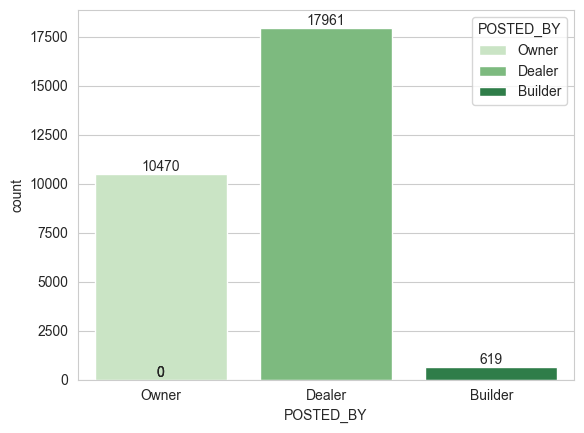

In [16]:
ax = sns.countplot(x="POSTED_BY", data=df, hue="POSTED_BY", palette="Greens", legend=True)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom")
plt.show()

Aqui se observa que la mayoria de las viviendas fueron publicadas por el dealer. Luego una gran cantidad tambien fue publicada por le dueño y muy pocas viviendas fueron publicadas por el contructor.

<h4 style="color: #5DADE2">UNDER_CONSTRUCTION</h4>

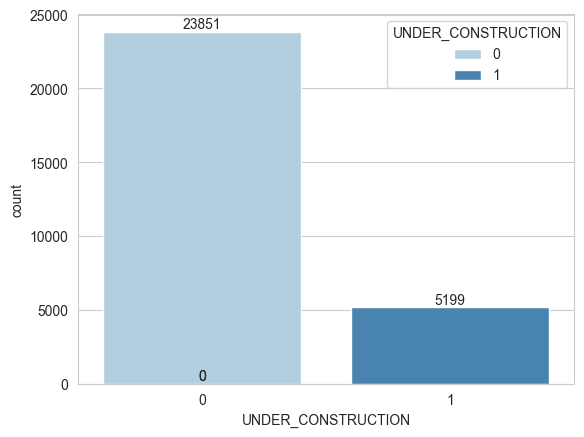

In [17]:
ax = sns.countplot(x="UNDER_CONSTRUCTION", data=df, hue="UNDER_CONSTRUCTION", palette="Blues", legend=True)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom")
plt.show()

Aqui se observa que la mayoria de las viviendas estan listas para ser habitadas mientras que algunas siguen estando en construccion.

<h4 style="color: #5DADE2">RERA</h4>

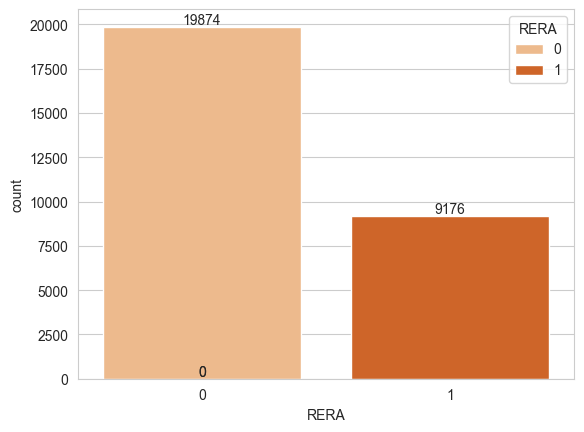

In [18]:
ax = sns.countplot(x="RERA", data=df, hue="RERA", palette="Oranges", legend=True)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom")
plt.show()

Aqui se observa que aproximadamente un tercio de los datos estan registrados bajo la ley rera pero dos tercios de ellos no estan registrados

<h4 style="color: #5DADE2">BHK_NO.</h4>

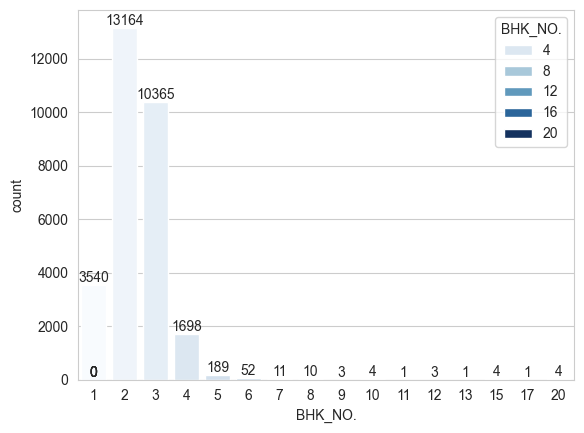

In [19]:
ax = sns.countplot(x="BHK_NO.", data=df, hue="BHK_NO.", palette="Blues", legend=True)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom")
plt.show()

Aqui se observa que la mayoria de las viviendas poseen entre una y cinco habitaciones, siendas las viviendas con dos o tres habitaciones las que predominan en el dataset. Existen viviendas con seis o mas habitaciones pero son casos muy raros que incluso podrian considerarse outliers.

<h4 style="color: #5DADE2">BHK_OR_RK</h4>

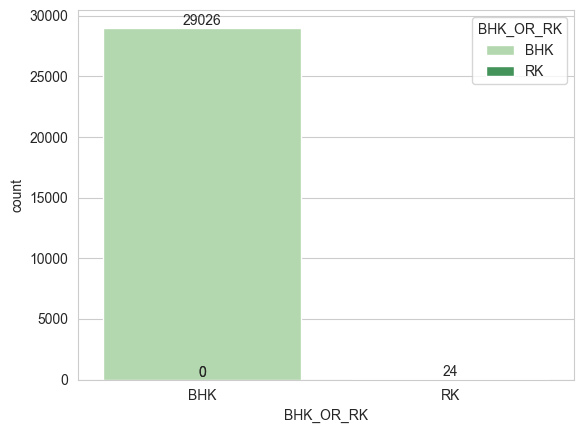

In [20]:
ax = sns.countplot(x="BHK_OR_RK", data=df, hue = "BHK_OR_RK", palette="Greens", legend=True)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom")
plt.show()

Aqui se observa que la gran mayoria de las viviendas son del estilo BHK (Bedroom, Hall, Kitchen) mientras que muy pocas son del estilo RK (Room, Kitchen).

<h4 style="color: #5DADE2">SQUARE_FT</h4>

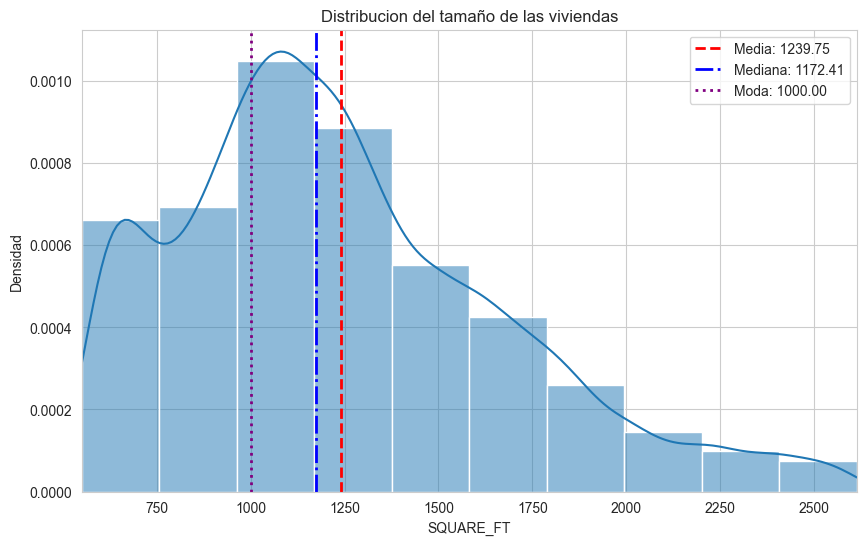

In [21]:
lower = df["SQUARE_FT"].quantile(0.05)
upper = df["SQUARE_FT"].quantile(0.95)

data = df["SQUARE_FT"][(df["SQUARE_FT"] >= lower) & (df["SQUARE_FT"] <= upper)]

mean_val = data.mean()
median_val = data.median()
mode_val = data.mode()[0]

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=10, kde=True, stat="density")

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Media: {mean_val:.2f}")
plt.axvline(median_val, color="blue", linestyle="-.", linewidth=2, label=f"Mediana: {median_val:.2f}")
plt.axvline(mode_val, color="purple", linestyle=":", linewidth=2, label=f"Moda: {mode_val:.2f}")

plt.xlim(lower, upper)

plt.legend()
plt.title("Distribucion del tamaño de las viviendas")
plt.xlabel("SQUARE_FT")
plt.ylabel("Densidad")

plt.show()


Este grafico muestra que el tamaño de las viviendas varia mucho y se pueden encontrar en diferentes tamaños. Lo mas inusual son las viviendas de mas de 2000 metros cuadrados pero hay una cantidad suficiente para no considerarlas como outliers.<br>ACLARACION: Este grafico se realizo en el rango de 0.05 a 0.95 con el objetivo de eliminar los outliers y tener un grafico que represente los datos mas comunes.

<h4 style="color: #5DADE2">READY_TO_MOVE</h4>

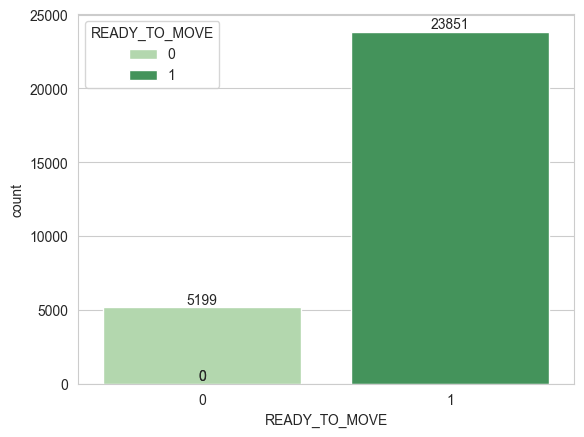

In [22]:
ax = sns.countplot(x="READY_TO_MOVE", data=df, hue = "READY_TO_MOVE", palette="Greens", legend=True)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom")
plt.show()

Aqui se observa que la mayoria de las viviendas estan listas para ser habitadas mientras que algunas aun no lo estan o siguen en construccion

<h4 style="color: #5DADE2">RESALE</h4>

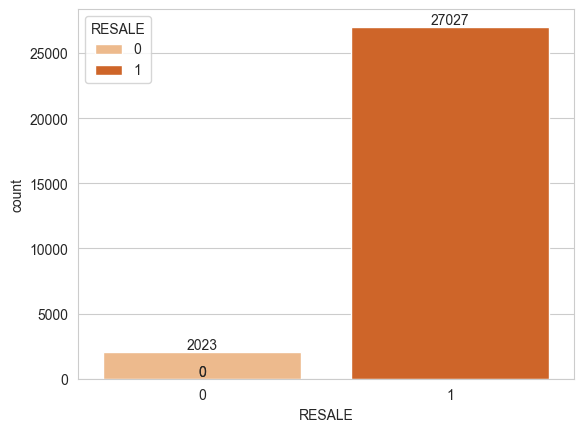

In [24]:
ax = sns.countplot(x="RESALE", data=df, hue = "RESALE", palette="Oranges", legend=True)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom")
plt.show()

Aqui se observa que la gran mayoria de las viviendas son de reventa y muy pocas son nuevas.

<h4 style="color: #5DADE2">LATITUDE</h4>

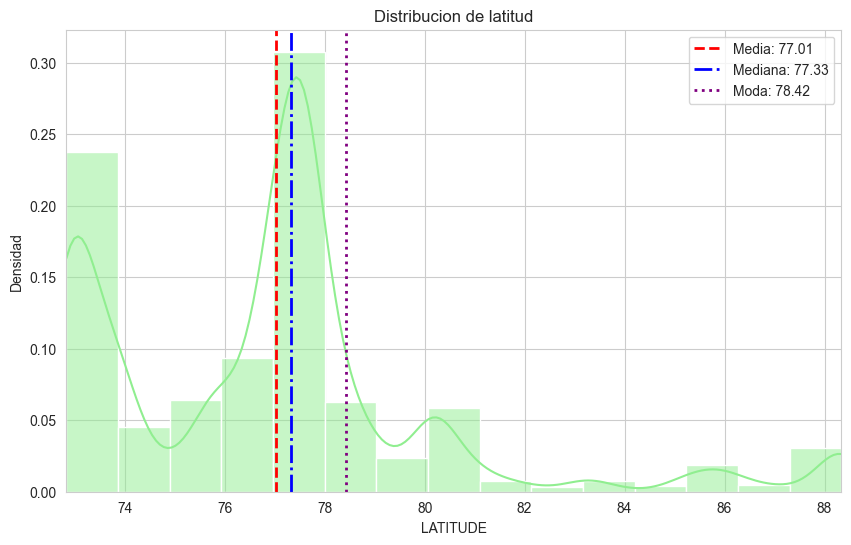

In [25]:
lower = df["LATITUDE"].quantile(0.05)
upper = df["LATITUDE"].quantile(0.95)

data = df["LATITUDE"][(df["LATITUDE"] >= lower) & (df["LATITUDE"] <= upper)]

mean_val = data.mean()
median_val = data.median()
mode_val = data.mode()[0]

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=15, kde=True, stat="density", color="lightgreen")

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Media: {mean_val:.2f}")
plt.axvline(median_val, color="blue", linestyle="-.", linewidth=2, label=f"Mediana: {median_val:.2f}")
plt.axvline(mode_val, color="purple", linestyle=":", linewidth=2, label=f"Moda: {mode_val:.2f}")

plt.xlim(lower, upper)

plt.legend()
plt.title("Distribucion de latitud")
plt.xlabel("LATITUDE")
plt.ylabel("Densidad")

plt.show()

Hay viviendas disrtibuidas en diferentes latitudes pero principlamente se encuentran entre las latitudes 73-74 y entre 76-78

<h4 style="color: #5DADE2">LONGITUDE</h4>

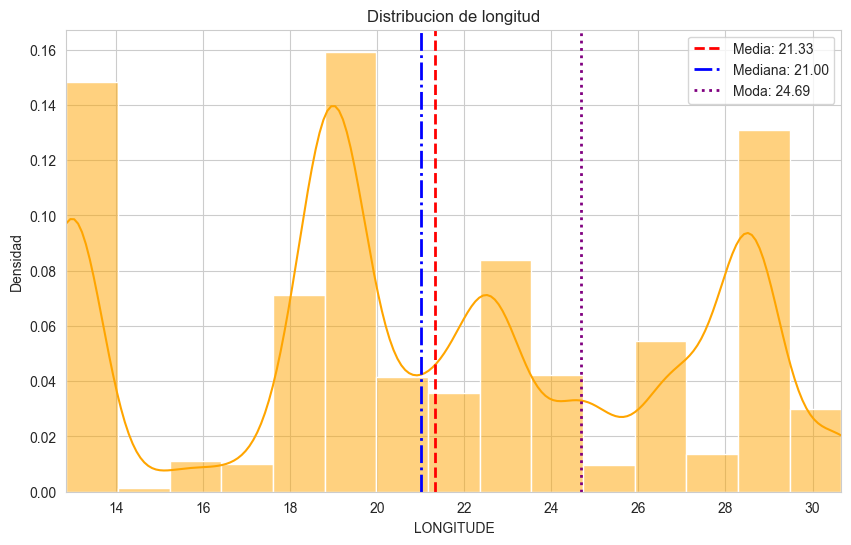

In [26]:
lower = df["LONGITUDE"].quantile(0.05)
upper = df["LONGITUDE"].quantile(0.95)

data = df["LONGITUDE"][(df["LONGITUDE"] >= lower) & (df["LONGITUDE"] <= upper)]

mean_val = data.mean()
median_val = data.median()
mode_val = data.mode()[0]

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=15, kde=True, stat="density", color="orange")

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Media: {mean_val:.2f}")
plt.axvline(median_val, color="blue", linestyle="-.", linewidth=2, label=f"Mediana: {median_val:.2f}")
plt.axvline(mode_val, color="purple", linestyle=":", linewidth=2, label=f"Moda: {mode_val:.2f}")

plt.xlim(lower, upper)

plt.legend()
plt.title("Distribucion de longitud")
plt.xlabel("LONGITUDE")
plt.ylabel("Densidad")

plt.show()

La longitud se observa que esta mas distribuida que la latitud, sin embargo hay concentraciones de viviendas en los rangos 13-14, 18-23 y 28-29

<h4 style="color: #5DADE2">TARGET(PRICE_IN_LACS)</h4>

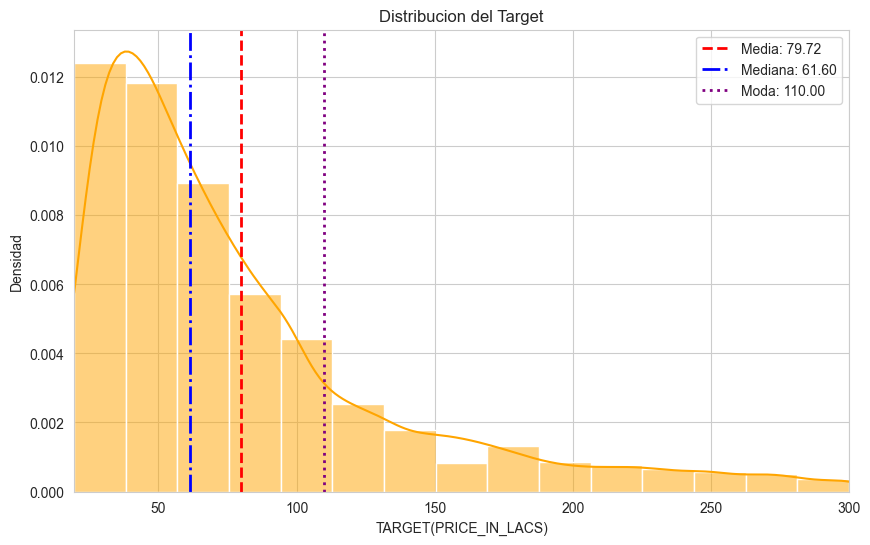

In [27]:
lower = df["TARGET(PRICE_IN_LACS)"].quantile(0.05)
upper = df["TARGET(PRICE_IN_LACS)"].quantile(0.95)

data = df["TARGET(PRICE_IN_LACS)"][(df["TARGET(PRICE_IN_LACS)"] >= lower) & (df["TARGET(PRICE_IN_LACS)"] <= upper)]

mean_val = data.mean()
median_val = data.median()
mode_val = data.mode()[0]

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=15, kde=True, stat="density", color="orange")

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Media: {mean_val:.2f}")
plt.axvline(median_val, color="blue", linestyle="-.", linewidth=2, label=f"Mediana: {median_val:.2f}")
plt.axvline(mode_val, color="purple", linestyle=":", linewidth=2, label=f"Moda: {mode_val:.2f}")

plt.xlim(lower, upper)

plt.legend()
plt.title("Distribucion del Target")
plt.xlabel("TARGET(PRICE_IN_LACS)")
plt.ylabel("Densidad")

plt.show()

Los precios de las viviendas se concentran en el rango de 25 a 100 lacs.

<h2 style="color: #3498DB">Analisis/Imputacion de valores nulos</h2>

In [28]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

Aqui se puede observar que ninguna de la doce variables posee valores nulos por lo cual no hay necesidad de eliminar o reemplaar valores.

<h2 style="color: #3498DB">Analisis de valores extremos</h2>

En las variables cualitativas no se pueden analizar valores extremos ya que esta es una caractersitica propia de las variables cuantitativas. Por eso, a continuacion se analizaran dichas varaibles.

<h4 style="color: #5DADE2">BHK_NO.</h4>

In [29]:
max_bhk_no = df["BHK_NO."].max()
min_bhk_no = df["BHK_NO."].min()
print(f"Maximo: {max_bhk_no}")
print(f"Minimo: {min_bhk_no}")

Maximo: 20
Minimo: 1


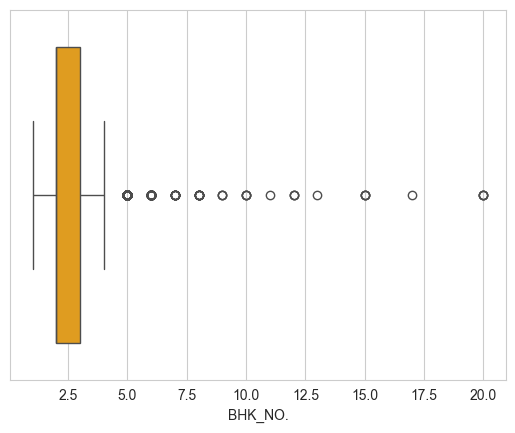

In [30]:
sns.boxplot(x="BHK_NO.", data=df, color="orange")
plt.show()

Aqui se observa que los valores mayores e iguales a cinco son considerados outliers. Lo cual concuerda con la distribucion que indicaba que habia muy pocas muestras para el rango 5-20.

<h4 style="color: #5DADE2">SQUARE_FT</h4>

In [31]:
max_square_ft = df["SQUARE_FT"].max()
min_square_ft = df["SQUARE_FT"].min()
print(f"Maximo: {max_square_ft}")
print(f"Minimo: {min_square_ft}")

Maximo: 254545454.5
Minimo: 3.0


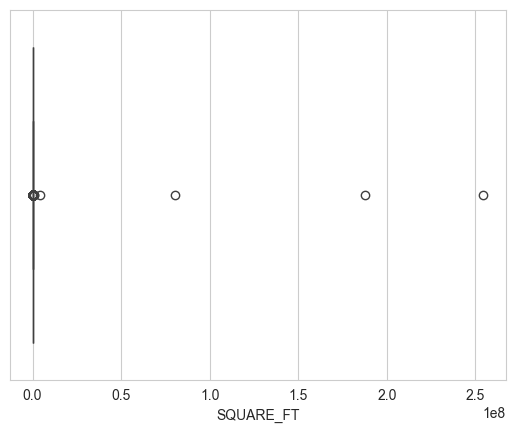

In [32]:
sns.boxplot(x="SQUARE_FT", data=df)
plt.show()

Aqui se observa que hay valores que se entienden demasiado de la mediana y claramente son considerados outliers. Por ejemplo, el valor maximo es 254545454.5 y la media es 1241

<h4 style="color: #5DADE2">LONGITUDE</h4>

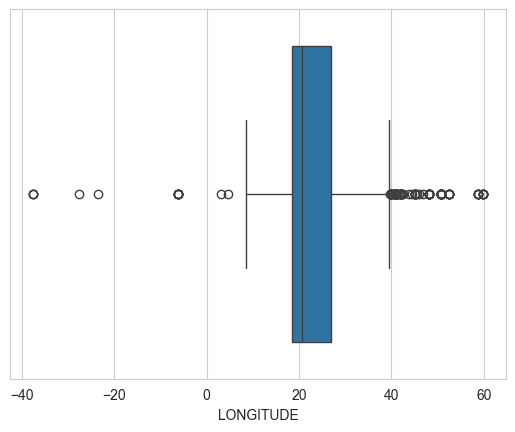

In [33]:
sns.boxplot(x="LONGITUDE", data=df)
plt.show()

Aqui hay algunos valores que estan fuera del rango pero no los consideraria outliers ya que no se encuentran tan alejados de la mediana y tranquilamente pueden ser puntos validos para una vivienda

<h4 style="color: #5DADE2">LATITUDE</h4>

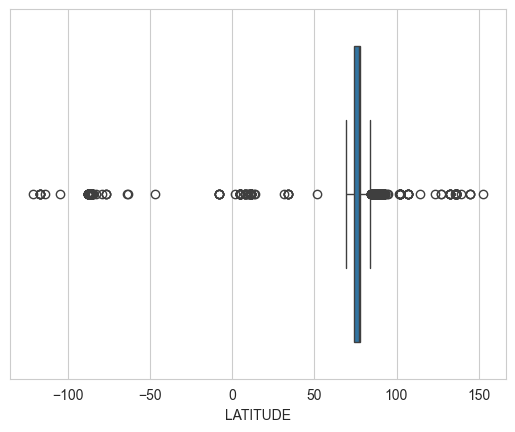

In [34]:
sns.boxplot(x="LATITUDE", data=df)
plt.show()

Al igual que la longitud, los puntos que se encuentran fuera del rango lo consideraria normales porque no estan tan alejados de la mediana

<h4 style="color: #5DADE2">TARGET(PRICE_IN_LACS)</h4>

In [35]:
max_target = df["TARGET(PRICE_IN_LACS)"].max()
min_target = df["TARGET(PRICE_IN_LACS)"].min()
print(f"Maximo: {max_target}")
print(f"Minimo: {min_target}")

Maximo: 30000.0
Minimo: 0.25


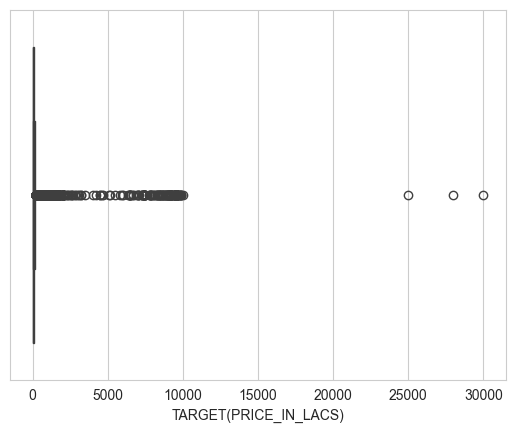

In [36]:
sns.boxplot(x="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

Aqui se observa que los precios de viviendas estan en el rango de 0 a 10000 lacs. Luego hay valores que se extienden mucho mas alla de ese rango, como las viviendas con precios de 25000 o 30000 que claramente son outliers. 

<h2 style="color: #3498DB">Relacion de features con el target</h2>

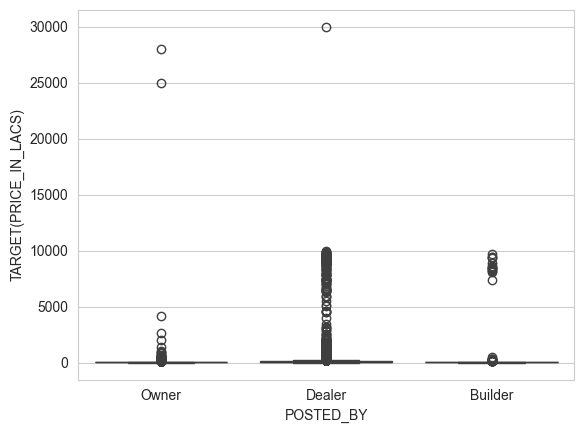

In [38]:
sns.boxplot(x="POSTED_BY", y="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

Aqui podemos observar que los dueños publican viviendas con precios bajos llegando a maximos de 5000 lacs. Los dealers publican viviendas con precios muy variados de 0 a 10000 lacs. Los constructores publican precios o muy bajos o cercanos a 10000 lacs. De los tres outliers, dos fueron publicados por los dueños y el maximo fue pulbicado por un delaer

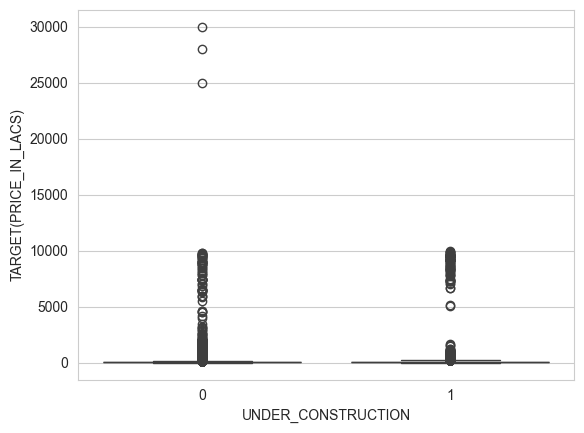

In [39]:
sns.boxplot(x="UNDER_CONSTRUCTION", y="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

De las viviendas que estan en construccion, se publican con precios o muy bajos o muy cercanos a 10000. Por ejemplo no hay viviendas en el rango 2500-5000. De las viviendas que no estan en construccion, tienen valores variados entre 0 y 10000. Los tres outlliers son de casas que no estan en construccion.

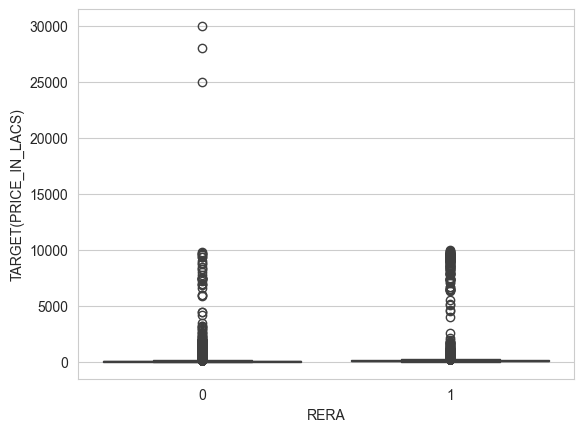

In [40]:
sns.boxplot(x="RERA", y="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

Al parecer, el hecho de que una vivienda este registrada hace que su valor aumente ya que la mayoria de viviendas entre 6000 y 10000 se encuentran registradas. Por otra parte, si las casas estan registradas o no, no afecta del todos a los precios de casas baratas. En cuanto a los outliers, los tres son de casas no registradas.

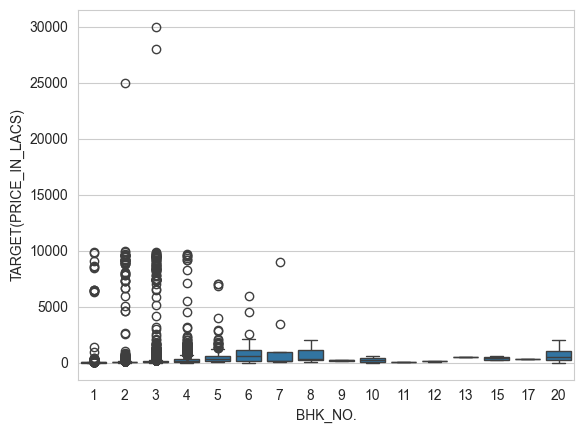

In [41]:
sns.boxplot(x="BHK_NO.", y="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

Aqui podemos observar que la correlacion no representa del todo a la realidad ya que viviendas con pocas habitaciones pueden llegar a 10000 lacs y viviendas con muchas habitaciones pueden llegar como maximo a 2500 lacs. En cuanto a los outliers, las tres viviendas poseen entre dos y tres habitaciones, por lo cual el precio es excesivo.

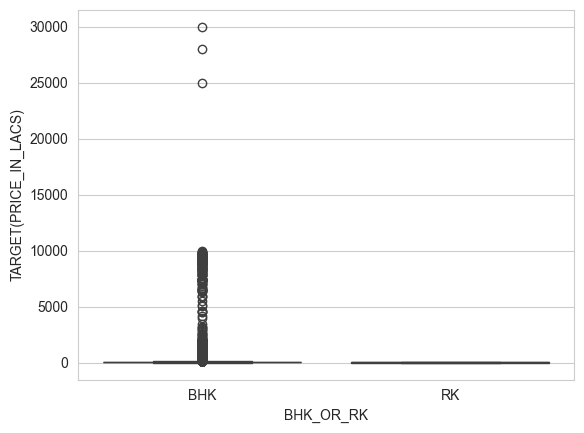

In [42]:
sns.boxplot(x="BHK_OR_RK", y="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

Aqui si hay una correlacion realista ya que las viviendas estilo RK son mas baratas que las de tipo BHK

<Axes: xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>

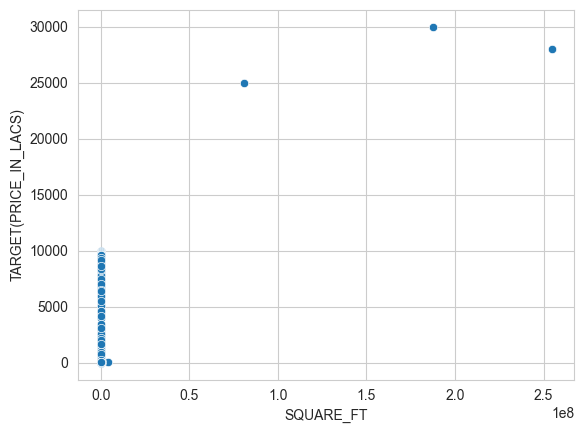

In [43]:
sns.scatterplot(x="SQUARE_FT", y="TARGET(PRICE_IN_LACS)", data=df)

Aqui se puede apreciar que las viviendas en general son de pocos pies cuadrados. Pero lo bueno de este grafico es que el precio excesivo de los outliers se debe principalmente a que poseen un terreno con muchos pies cuadrados.

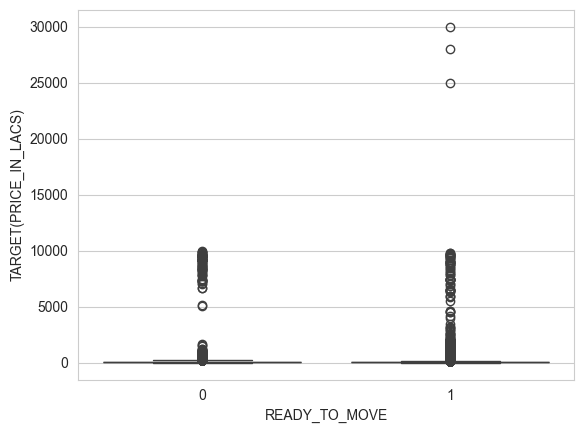

In [44]:
sns.boxplot(x="READY_TO_MOVE", y="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

Las viviendas que estan listas para ser habitadas poseen precios variados pero las que no estan listas para ser habitadas posee valores cercanos a los limites(0 o 10000)

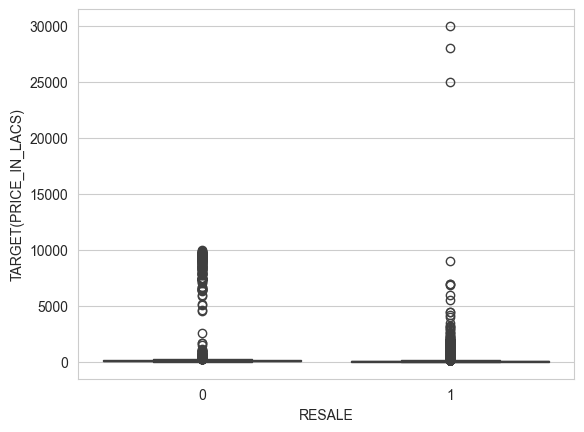

In [45]:
sns.boxplot(x="RESALE", y="TARGET(PRICE_IN_LACS)", data=df)
plt.show()

Las casas de reventa claramente tiene precios mas bajos que las casas a estrenar por lo cual aqui hay una buena relacion entre variables

<Axes: xlabel='LONGITUDE', ylabel='TARGET(PRICE_IN_LACS)'>

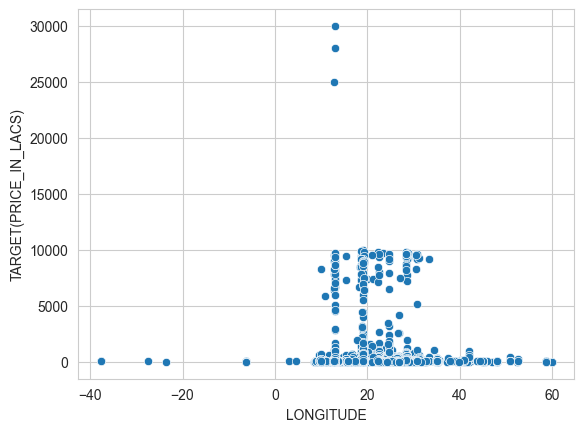

In [46]:
sns.scatterplot(x="LONGITUDE", y="TARGET(PRICE_IN_LACS)", data=df)

Aqui se observa que la mayoria de viviendas se encuentran entre las longitudes 10 y 30

<Axes: xlabel='LATITUDE', ylabel='TARGET(PRICE_IN_LACS)'>

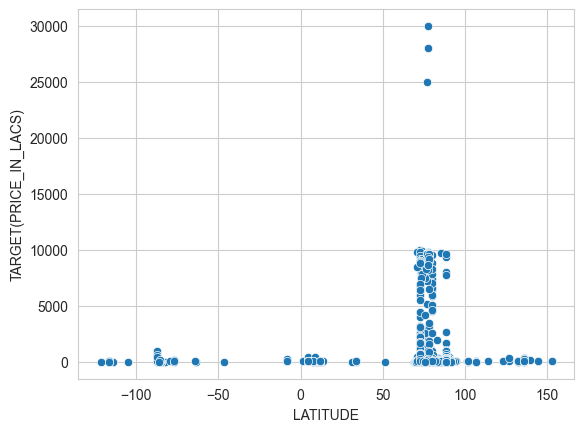

In [47]:
sns.scatterplot(x="LATITUDE", y="TARGET(PRICE_IN_LACS)", data=df)

Aqui se observa que la mayoria de viviendas se encuentran entre las latitudes 60 y 100

<h2 style="color: #3498DB">Correlaciones entre variables</h2>

In [48]:
df = pd.read_csv("train.csv")
df["POSTED_BY"] = df["POSTED_BY"].str.strip().str.capitalize()
df["BHK_OR_RK"] = df["BHK_OR_RK"].str.strip()

mapa_posted_by = {"Owner": 0, "Dealer": 1, "Builder": 2}

df["POSTED_BY"] = df["POSTED_BY"].map(mapa_posted_by)

mapa_bhk_or_kr = {"BHK": 0, "RK": 1} 
df["BHK_OR_RK"] = df["BHK_OR_RK"].map(mapa_bhk_or_kr)

df = df.drop(columns=["ADDRESS"])

df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,0,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5
5,0,0,0,3,0,1250.000000,1,1,10.033280,76.282571,42.0
6,1,0,0,3,0,1495.053957,1,1,26.916347,75.795600,66.5
7,0,0,1,3,0,1181.012946,1,1,30.740000,76.650000,52.0
8,1,0,1,2,0,1040.000000,1,1,13.054202,77.674002,41.6
9,0,0,1,2,0,879.120879,1,1,12.951610,80.140970,36.0


Para poder realizar un heatmap se tuvo que mapear las variables cualitativas POSTED_BY y BHK_OR_RK a variables numericas. Ademas se elimino la variable ADDRESS ya que no se podia transformar directamente a una variable numerica.

<Axes: title={'center': 'Correlacion entre variables'}>

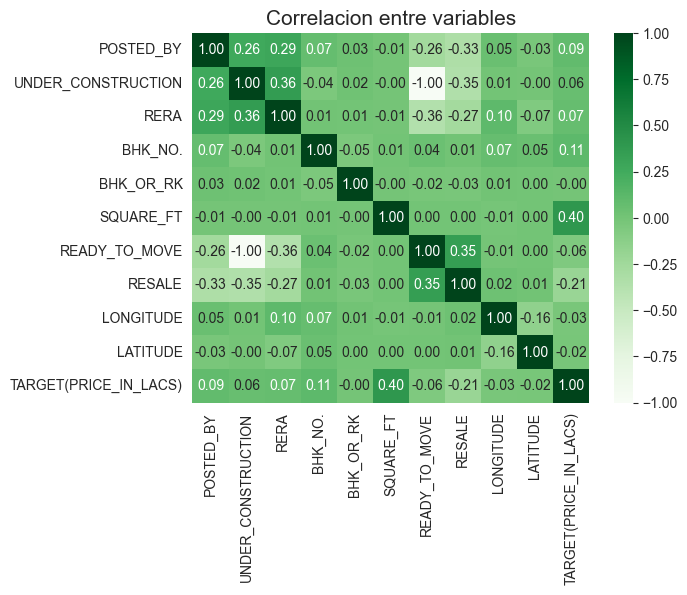

In [54]:
plt.title('Correlacion entre variables', fontsize=15)
sns.heatmap(df.corr(), annot=True, fmt=".2f",cmap='Greens')

En la mayoria de variables hay una relacion muy cercana a cero lo cual indica que no hay relacion pero algunas tiene valores un poco mas alto que vale la pena mencionar.<br>
Relacion de -1 entre UNDER_CONSTRUCTION y READY_TO_MOVE<br>
Relacion de 0,4 entre TARGET y SQUARE_FT<br>
Relacion de 0.21 entre TARGET y RESALE<br>
Relacion de -0.33 entre RESALE y POSTED_BY<br>
Relacion de -0.35 entre RESALE y UNDER_CONSTRUCTION<br>
Relacion de -0.27 entre RESALE y RERA<br>
Relacion de 0.35 entre RESALE y READY_TO_MOVE<br>
Relacion de -0.26 entre READY_TO_MOVE y POSTED_BY<br>
Relacion de -0.36 entre READY_TO_MOVE y RERA<br>
Relacion de 0.29 entre RERA y POSTED_BY<br>
Relacion de 0.36 entre RERA y UNDER_CONSTRUCTION<br>
Relacion de 0.26 entre UNDER_CONSTRUCTION y POSTED_BY<br>

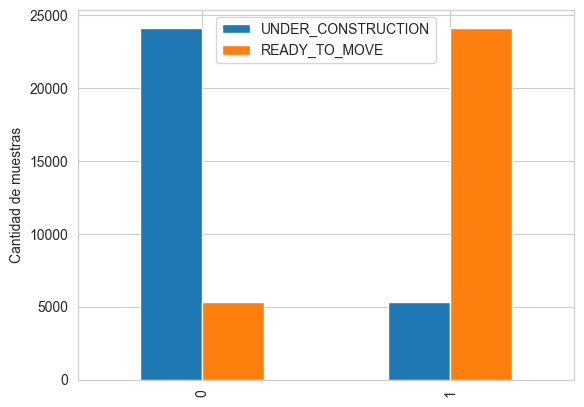

In [55]:
df[["UNDER_CONSTRUCTION","READY_TO_MOVE"]].apply(pd.Series.value_counts).plot(kind="bar")
plt.ylabel("Cantidad de muestras")
plt.show()

Este grafico demuestra que efectivamente hay una correlacion perfecta e inversa entre UNDER_CONSTRUCTION y READY_TO_MOVE

<Axes: xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>

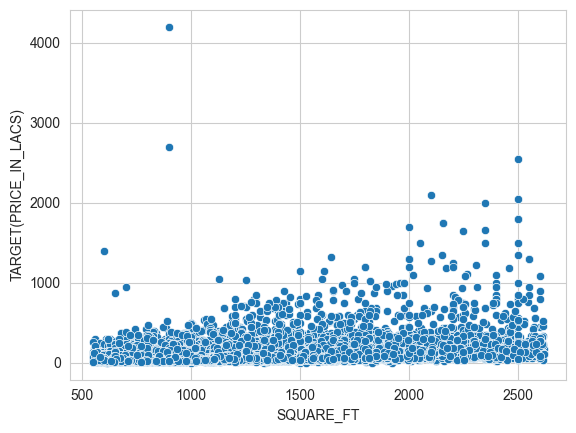

In [51]:
lower = df["SQUARE_FT"].quantile(0.05)
upper = df["SQUARE_FT"].quantile(0.95)

df_filtrado = df[(df["SQUARE_FT"] >= lower) & (df["SQUARE_FT"] <= upper)]

sns.scatterplot(x="SQUARE_FT", y="TARGET(PRICE_IN_LACS)", data=df_filtrado)

Aqui se demuestra que efectivamente los precios tienden a subir con respecto al tamaño del terreno

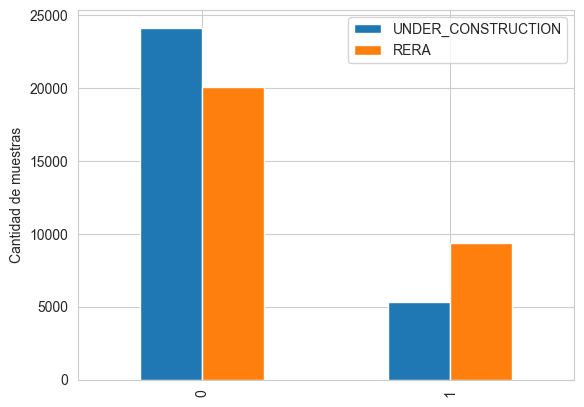

In [56]:
df[["UNDER_CONSTRUCTION","RERA"]].apply(pd.Series.value_counts).plot(kind="bar")
plt.ylabel("Cantidad de muestras")
plt.show()

RERA tiene una correlacion de 0.36 con UNDER_CONSTRUCTION, UNDER_CONTRUCTION tiene una correlacion de -1 con READY_TO_MOVE => RERA tiene una corelacion de -0.36 con READY_TO_MOVE

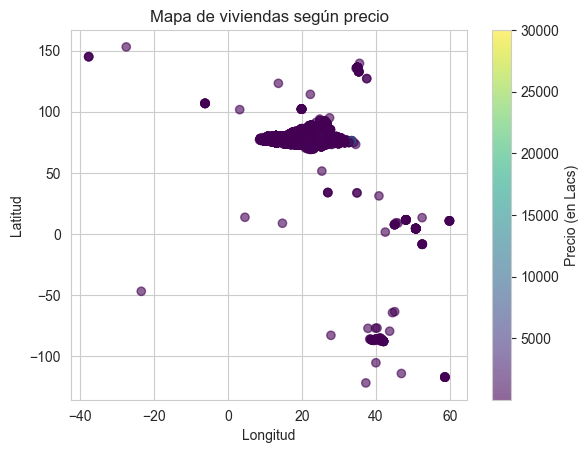

In [ ]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'],
            c=df['TARGET(PRICE_IN_LACS)'],
            cmap='viridis', alpha=0.6)

plt.colorbar(label='Precio (en Lacs)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de viviendas según precio')
plt.show()

Este grafico muestra las ubicaciones de las viviendas en un grafico de latitudes y longitudes. Ademas cada punto esta coloreado segun el precio de la vivienda.

<h2 style="color: #3498DB">Conclusion</h2>

El dataset train.csv posee 29.451 registros y 12 variables, de tipo categóricas, discretas y continuas. No presenta valores nulos, aunque sí contiene valores extremos en las variables SQUARE_FT y TARGET(PRICE_IN_LACS), además de 401 registros duplicados que fueron eliminados para mejorar la calidad del análisis.<br>

En cuanto a la distribución, la mayoría de las viviendas fueron publicadas por dealers, son de tipo BHK, corresponden a propiedades de reventa y están listas para mudarse. Predominan las viviendas con 2 a 3 habitaciones, con superficies en torno a 1000 pies cuadrados, ubicadas principalmente en las zonas con latitud entre 60–100 y longitud entre 10–25.<br>

Las variables con mayor relación con el precio son SQUARE_FT (correlación de 0.40) y RESALE (correlación de 0.21). Esto indica que, en promedio, a mayor superficie habitable el precio tiende a incrementarse, y que las propiedades a estrenar suelen tener un mayor valor respecto a las de reventa.<br>

Las variables categóricas también muestran dependencias claras:<br>

UNDER_CONSTRUCTION y READY_TO_MOVE están perfectamente correlacionadas de forma inversa.<br>

RERA se asocia tanto al estado de construcción como al tipo de publicador y a la disponibilidad de la vivienda.<br>

RESALE influye en características como el estado de construcción y el agente que publica la propiedad.<br>

Por último, los outliers presentes en precio y superficie deben ser tratados mediante eliminación o transformación, ya que están muy alejados de la mediana y podrían distorsionar los modelos predictivos. De este modo, el dataset quedará listo para la construcción de un modelo de machine learning más robusto y confiable. Ademas la variable ADRESS necesita de un tratamiento o transformacion para ser incluida en el entrenamiento ya que en su formato actual no es posible procesarla.